# List of largest companies in the United States by revenue


## Data Scrapping

In [88]:
# Install Libraries needed
#pip install beautifulsoup4
#pip install requests

#### Importa Bibliotecas

In [89]:
#Import Lib's
from bs4 import BeautifulSoup
import requests


#### Faz o request e o soup da Página

In [90]:
# URL of the page targeted in the scrap
url='https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

# Page Request
page=requests.get(url, verify= False)

#Soup
soup= BeautifulSoup(page.text, 'html')

c:\Users\TIBUFF\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'en.wikipedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [91]:
# Testing the content the soup retrieved
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-c

In [92]:
#<table class="wikitable sortable jquery-tablesorter">


#### Procura o objeto pretendido Tabela 

##### Duas Formas

In [93]:
# the objective is to find the table withm the top 100 companies in the US
table=soup.find_all('table')[1]

In [94]:
soup.find('table', class_ = 'wikitable sortable')

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [95]:
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

#### Encontra/Trata os títulos da Tabela 

In [96]:
# inspection gives us the tag for the columns is <th>
world_titles=table.find_all('th')
print(world_titles)

[<th>Rank
</th>, <th>Name
</th>, <th>Industry
</th>, <th>Revenue <br/>(USD millions)
</th>, <th>Revenue growth
</th>, <th>Employees
</th>, <th>Headquarters
</th>]


In [97]:
world_table_titles = [title.text.strip() for title in world_titles]
print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


## Análise de  Dados


#### Tratamento dos Dados

In [98]:
import pandas as pd

In [99]:
df=pd.DataFrame(columns=world_table_titles)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [100]:
# inspection gives us the tag for the columns is <tr>
column_data=table.find_all('tr')
print(column_data)

[<tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>, <tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.7%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><

In [101]:
# inspection gives us the tag for the columns is <td>
#Collect the data to a dataframe
for row in column_data[1:]:
   row_data= row.find_all('td')
   individual_row_data=[data.text.strip()for data in row_data]
   individual_row_data
   #Insert the data in the df based on the lenght
   length = len(df)
   df.loc[length] = individual_row_data
   

In [102]:
individual_row_data
len(df)

100

In [103]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [104]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB


,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
count,100,100,100,100,100,100,100
unique,100,100,39,99,92,97,76
top,1,Walmart,Financials,"47,194",9.4%,"50,000","New York City, New York"
freq,1,1,11,2,2,2,12


In [105]:
#Data treatment
def conv_employes(val):
    '''
    -Remove ","
    -Converte para int
    '''
    new_val=val.replace(',','')
    return int(new_val)
    
def conv_rev_grow(val):
    '''
    -Remove "%"
    -Converte para float
    '''
    new_val=val.replace('%','')
    return float(new_val) #/ 100






In [106]:
#df['Rank']=df['Rank'].astype(int)
#df['Revenue (USD millions)'] = df['Revenue (USD millions)']
#df['Employees'] = df['Employees'].astype(int)  # astype nao funciona aqui ois temo caracteres "," que dividem os milhares, preciso de um função para retirar

df['Rank']=df['Rank'].astype(int)
df['Employees'] = df['Employees'].apply(conv_employes)
df['Revenue growth'] = df['Revenue growth'].apply(conv_rev_grow)
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].apply(conv_employes)
#df[['City', 'State']] = df['Headquarters'].str.split(',', expand=True)
#df[['City', 'State']] = df['Headquarters'].str.split(',', expand=True)


In [108]:
df[['City', 'State']] = df['Headquarters'].str.split(',', n=1, expand=True)
#df[['City', 'State']] =  df["Headquarters"].apply(lambda x: pd.Series(str(x).split(",")))

ValueError: Columns must be same length as key

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    int32  
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    int64  
 4   Revenue growth          100 non-null    float64
 5   Employees               100 non-null    int64  
 6   Headquarters            100 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 5.9+ KB


In [109]:
df.head

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,513983,9.4,1540000,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,413680,44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,46298,10.6,71100,"Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,46159,0.5,34300,"New York City, New York"
97,98,United Airlines,Airline,44955,82.5,92795,"Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,44915,14.5,130000,"Waltham, Massachusetts"


##### Possíveis Análises:
###### 1-  Agrupamentos Por Industria
###### 2- Grafico Revenue Growth
###### 3- Qtd Empregados

In [22]:
#!pip install matplotlib
#!pip install squarify 
import matplotlib.pyplot as plt
import squarify 
import matplotlib as mpl
import seaborn as sns


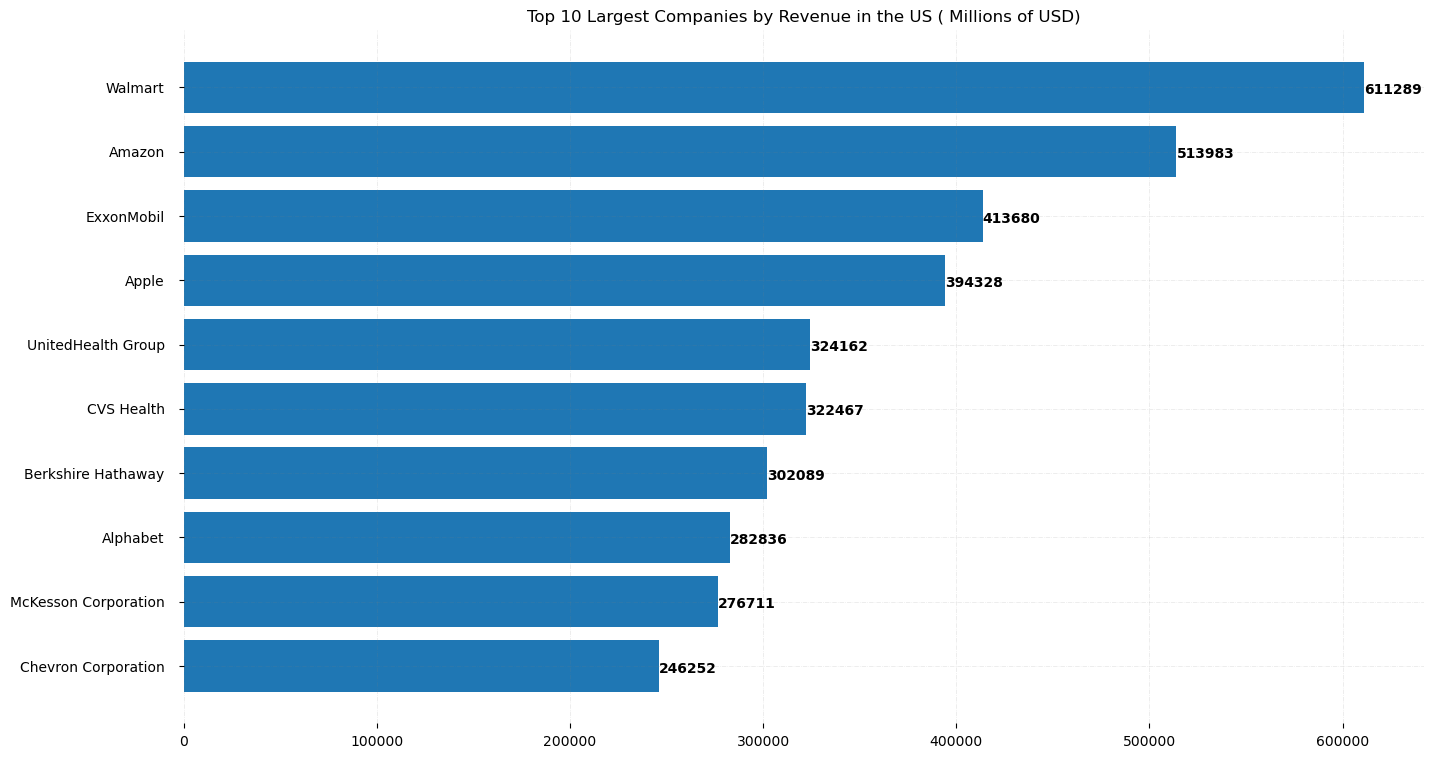

In [23]:
# plot Size
fig, ax = plt.subplots(figsize=(16,9))

# Horizontal bars
ax.barh(df['Name'][:10], df['Revenue (USD millions)'][:10])

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#      ylim=(0, 8), yticks=np.arange(1, 8))
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

#Show Top Values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')


#Add Plot Title 
ax.set_title ( 'Top 10 Largest Companies by Revenue in the US ( Millions of USD)')
plt.show()

In [24]:
#GroupBY
grupo_ind=df.groupby('Industry')
print(grupo_ind.groups)

{'Aerospace and Defense': [61], 'Aerospace and defense': [59], 'Agriculture cooperative': [91], 'Agriculture manufacturing': [82], 'Airline': [86, 90, 97], 'Apparel': [94], 'Automotive and Energy': [49], 'Automotive industry': [18, 20], 'Beverage': [45], 'Chemical industry': [76], 'Conglomerate': [6, 53, 58], 'Conglomerate and Telecomunications': [29], 'Consumer products Manufacturing': [50], 'Electronics industry': [3], 'Financial': [78, 84], 'Financial services': [22], 'Financials': [27, 31, 35, 43, 44, 46, 54, 55, 60, 62, 68], 'Food Processing': [81, 92], 'Food Service': [56], 'Food industry': [34, 57], 'Health': [8], 'Health Insurance': [14, 41], 'Healthcare': [4, 5, 13, 21, 24, 67], 'Infotech': [65], 'Insurance': [72, 77, 85, 87, 89], 'Laboratory instruments': [98], 'Logistics': [51], 'Machinery': [69], 'Media': [47], 'Petroleum industry': [2, 9, 15, 16, 17, 42, 48, 73, 75, 93], 'Petroleum industry and Logistics': [71], 'Pharmaceutical industry': [10, 26, 37, 39, 70, 74, 96], 'Ret

In [25]:
list(grupo_ind.groups)


['Aerospace and Defense',
 'Aerospace and defense',
 'Agriculture cooperative',
 'Agriculture manufacturing',
 'Airline',
 'Apparel',
 'Automotive and Energy',
 'Automotive industry',
 'Beverage',
 'Chemical industry',
 'Conglomerate',
 'Conglomerate and Telecomunications',
 'Consumer products Manufacturing',
 'Electronics industry',
 'Financial',
 'Financial services',
 'Financials',
 'Food Processing',
 'Food Service',
 'Food industry',
 'Health',
 'Health Insurance',
 'Healthcare',
 'Infotech',
 'Insurance',
 'Laboratory instruments',
 'Logistics',
 'Machinery',
 'Media',
 'Petroleum industry',
 'Petroleum industry and Logistics',
 'Pharmaceutical industry',
 'Retail',
 'Retail and cloud computing',
 'Technology',
 'Technology and Cloud Computing',
 'Telecom Hardware Manufacturing',
 'Telecommunications',
 'Transportation']

In [26]:
df[df['Industry'].str.contains('Aero')] # Aerospace and Defense
df[df['Industry'].str.contains('Automotive')] # After reviewing, should change every event in the list to 'Automotive' Company
df[df['Industry'].str.contains('Financial')] # Change Everything to Financial
df[df['Industry'].str.contains('Food')] # Change to Food
df[df['Industry'].str.contains('Health')]    # thinking about grouping everybody into "Healthcare", nut there some companies to take on consideration
df[df['Industry'].str.contains('Petroleum')]  # Aggregate to "Petroleum"
df[df['Industry'].str.contains('Retail')]  # Take Amazon into consideraon, tag is retail and cloud computing
df[df['Industry'].str.contains('Telecom')] # Change Cisco to Telecom instead of "Telecom Hardware Manufacturing	"

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
25,26,Verizon Communications,Telecommunications,136835,0.024,117100,"New York City, New York"
28,29,Comcast,Telecommunications,121427,0.043,186000,"Philadelphia, Pennsylvania"
29,30,AT&T,Conglomerate and Telecomunications,120741,0.285,160700,"Dallas, Texas"
80,81,Charter Communications,Telecommunications,54022,0.045,101700,"Stamford, Connecticut"
83,84,Cisco,Telecom Hardware Manufacturing,51557,0.035,83300,"San Jose, California"


In [27]:
new_df= df

In [28]:
df[df['Industry'].str.contains('Ins')]    # thinking about grouping everybody into "Healthcare", nut there some companies to take on consideration

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
14,15,Cigna,Health Insurance,180516,0.037,70231,"Bloomfield, Connecticut"
41,42,Humana,Health Insurance,92870,0.118,67100,"Louisville, Kentucky"
72,73,New York Life Insurance Company,Insurance,58445,0.142,15050,"New York City, New York"
77,78,AIG,Insurance,56437,0.084,26200,"New York City, New York"
85,86,Allstate,Insurance,51412,0.034,54250,"Northfield Township, Cook County, Illinois"
87,88,Liberty Mutual,Insurance,49956,0.036,50000,"Boston, Massachusetts"
89,90,Progressive Corporation,Insurance,49611,0.040,55063,"Mayfield Village, Ohio"


In [29]:
# After reviewing, should change every event in the list to 'Automotive' Company
for x in new_df.index:
  if new_df.loc[x, "Industry"] == 'Automotive industry' or new_df.loc[x, "Industry"] == 'Automotive and Energy' :
    new_df.loc[x, "Industry"] = 'Automotive'    
#new_df[new_df['Industry'].str.contains('Automotive')]   

# Aerospace and Defense
for x in new_df.index:
  if new_df.loc[x,'Industry'] == 'Aerospace and defense':
    new_df.loc[x,'Industry'] = "Aerospace and Defense"
#new_df[new_df['Industry'].str.contains('Aero')]

#Change Everything to Financial
Fin = new_df['Industry'].str.contains('Financial')
new_df.loc[Fin,"Industry"] = 'Financial'
new_df[new_df['Industry'].str.contains('Financial')]

#Change Everything to Food
Food=new_df['Industry'].str.contains('Food')
new_df.loc[Food,'Industry'] = 'Food'
new_df[new_df['Industry'].str.contains('Food')]

# Aggregate to "Petroleum"
Pet=new_df['Industry'].str.contains('Petroleum')
new_df.loc[Pet,'Industry'] = 'Petroleum'
new_df[new_df['Industry'].str.contains('Petroleum')]

# The Case of Amazon & Cloud computing (AWS)
ret=new_df['Industry'].str.contains('Retail')
new_df.loc[ret,'Industry'] = 'Retail'
new_df[new_df['Industry'].str.contains('Retail')]


# Health Insurance to insurance
ins=new_df['Industry'].str.contains('Health Insurance')
new_df.loc[ins,'Industry'] = 'Insurance'
new_df[new_df['Industry'].str.contains('Insurance')]

# Healthcare to Health
ins=new_df['Industry'].str.contains('Healthcare')
new_df.loc[ins,'Industry'] = 'Health'
new_df[new_df['Industry'].str.contains('Health')]



,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
4,5,UnitedHealth Group,Health,324162,0.127,400000,"Minnetonka, Minnesota"
5,6,CVS Health,Health,322467,0.104,259500,"Woonsocket, Rhode Island"
8,9,McKesson Corporation,Health,276711,0.048,48500,"Irving, Texas"
13,14,Cardinal Health,Health,181364,0.116,46035,"Dublin, Ohio"
21,22,Elevance Health,Health,156595,0.130,102200,"Indianapolis, Indiana"
24,25,Centene,Health,144547,0.147,74300,"St. Louis, Missouri"
67,68,HCA Healthcare,Health,60233,0.025,250500,"Nashville, Tennessee"


In [30]:
# new_df_grupo_ind= new_df.groupby('Industry').count()
# new_df_grupo_ind['Rank']

Grouped_industry = new_df.groupby(['Industry'])['Industry'].count()
Grouped_industry

Industry
Aerospace and Defense                  2
Agriculture cooperative                1
Agriculture manufacturing              1
Airline                                3
Apparel                                1
Automotive                             3
Beverage                               1
Chemical industry                      1
Conglomerate                           3
Conglomerate and Telecomunications     1
Consumer products Manufacturing        1
Electronics industry                   1
Financial                             14
Food                                   5
Health                                 7
Infotech                               1
Insurance                              7
Laboratory instruments                 1
Logistics                              1
Machinery                              1
Media                                  1
Petroleum                             11
Pharmaceutical industry                7
Retail                                11
Technol

In [31]:
Grouped_industry = new_df.groupby(['Industry'], as_index= False)
#Grouped_industry['Revenue (USD millions)']
#teste=new_df.groupby(['Industry']).size().to_frame()


In [32]:
#gp_ind_rev=Grouped_industry['Revenue (USD millions)'].sum().sort_values( ascending= False).plot(kind='barh', color = 'grey')
#gp_ind_rev

In [33]:
teste=Grouped_industry[['Revenue (USD millions)']].aggregate(sum)

teste[teste['Revenue (USD millions)'] ==teste['Revenue (USD millions)'].min()]

,Industry,Revenue (USD millions)
17,Laboratory instruments,44915


In [34]:
teste.describe()

,Revenue (USD millions)
count,2.900000e+01
mean,4.054016e+05
std,5.280108e+05
min,4.491500e+04
25%,6.234400e+04
50%,1.445080e+05
75%,4.457180e+05
max,2.092892e+06


In [35]:
teste=teste[teste['Revenue (USD millions)']>=144508]
teste


,Industry,Revenue (USD millions)
3,Airline,144508
5,Automotive,396254
8,Conglomerate,445718
11,Electronics industry,394328
12,Financial,1189129
13,Food,337900
14,Health,1466079
16,Insurance,539247
21,Petroleum,1580268
22,Pharmaceutical industry,730059


In [36]:
# Definindo a paleta de cores para o treemap
cmap = mpl.cm.seismic
mini = min(teste['Revenue (USD millions)'])
maxi = max(teste['Revenue (USD millions)'])
norm = mpl.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(i)) for i in teste['Revenue (USD millions)']]

(0.0, 100.0, 0.0, 100.0)

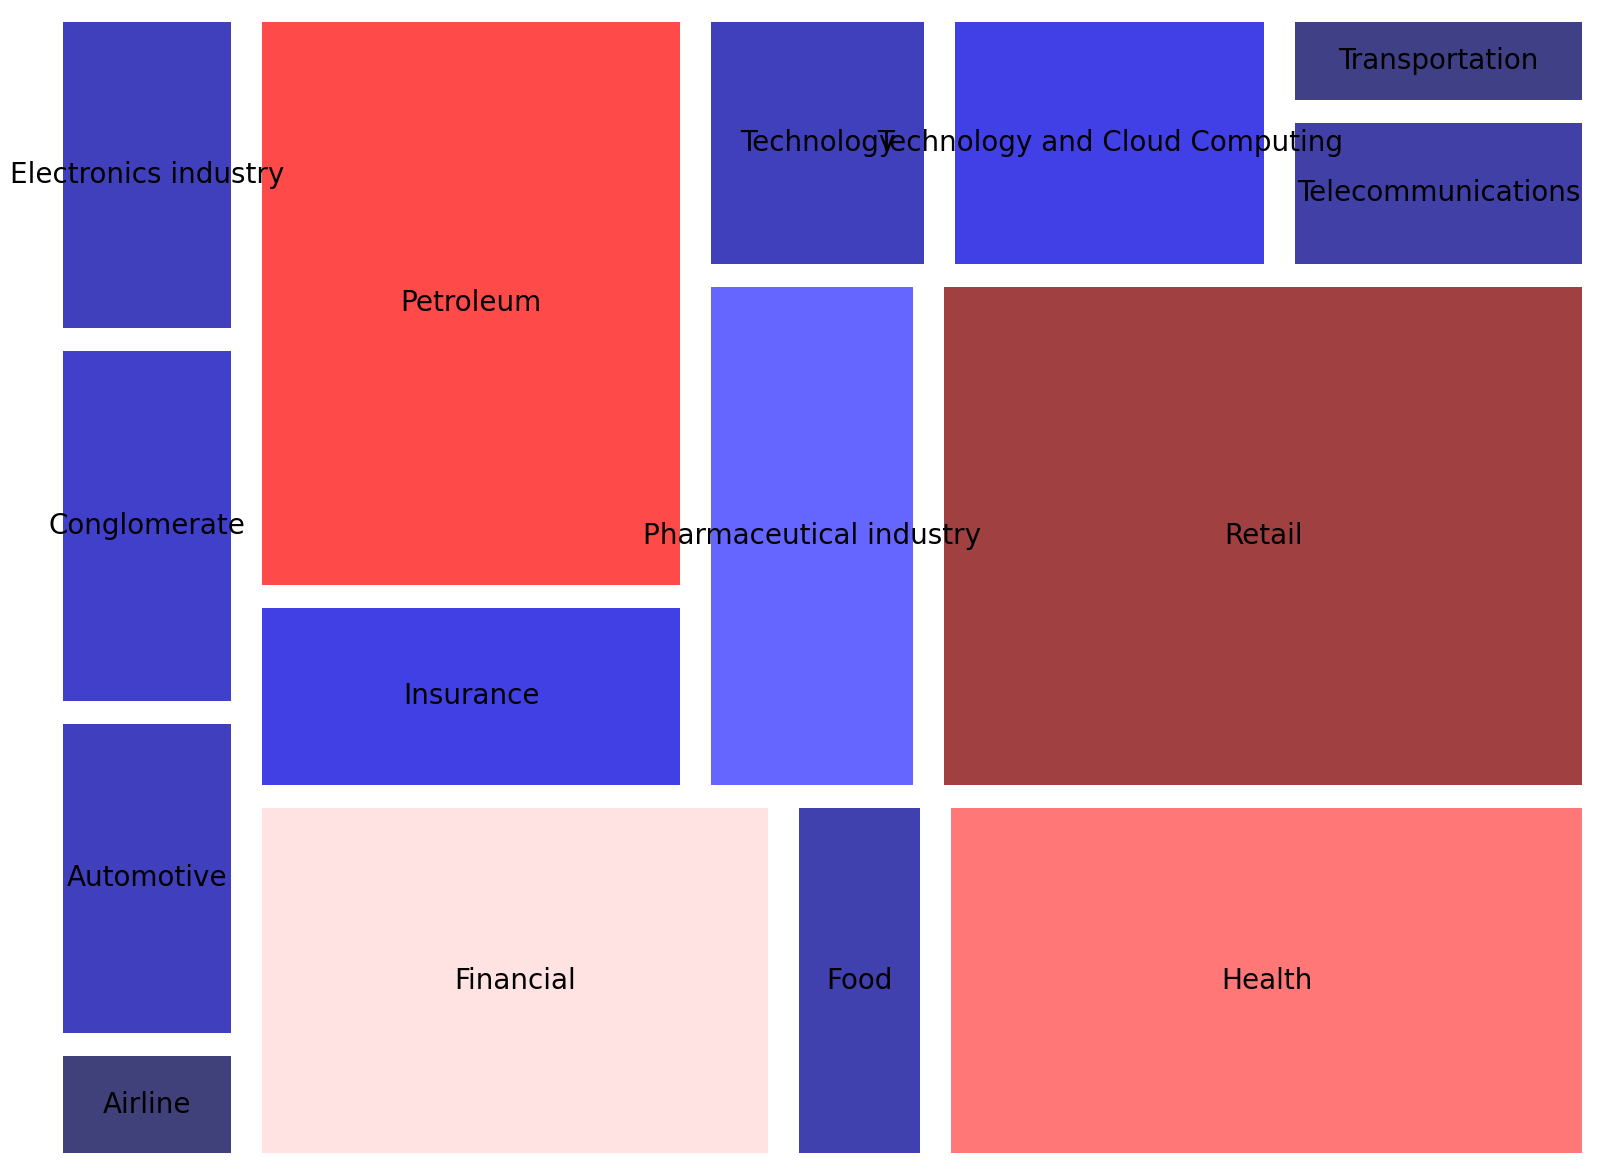

In [37]:
# squarify.plot(sizes=Grouped_industry['Revenue (USD millions)'] ,label=Grouped_industry['Industry'])
# plt.axis('off')
# plt.show()

#df_gp=Grouped_industry.to_frame()
#Gp_ind_df = new_df.groupby(['Industry']).agg

color = 'black'
mpl.rcParams['text.color'] = color
mpl.rcParams['font.size'] = 20

plt.figure(figsize=(20, 15))
norms = squarify.normalize_sizes(teste['Revenue (USD millions)'].to_list(),  dx=3, dy=3)
squarify.plot(sizes= norms, label=teste['Industry'], alpha = 0.75, color=colors, pad= True)

#Removing the axis values
plt.axis('off')

#teste


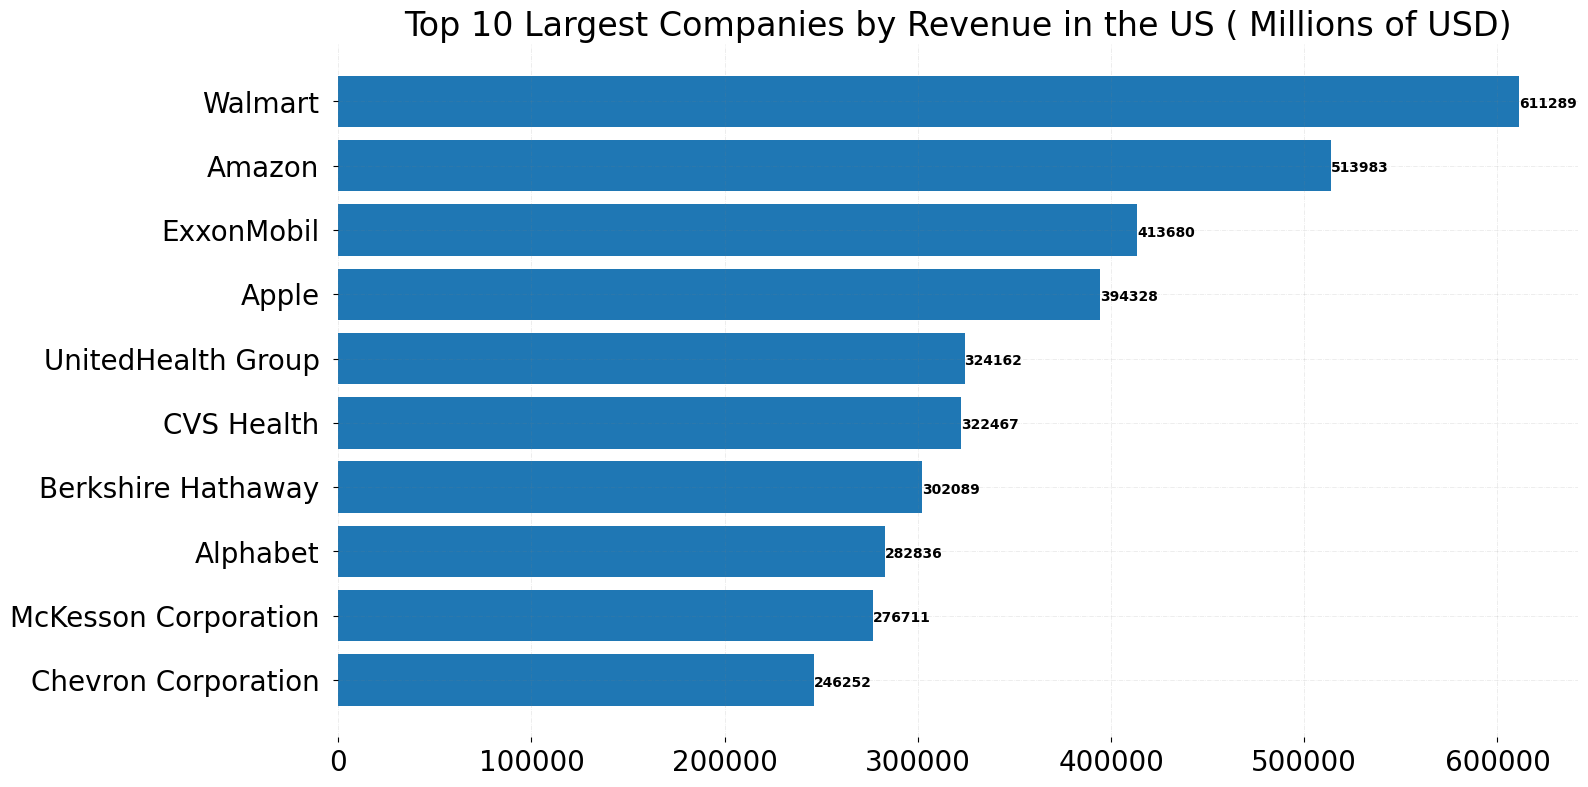

In [38]:
# plot Size
fig, ax = plt.subplots(figsize=(16,9))

# Horizontal bars
ax.barh(df['Name'][:10], df['Revenue (USD millions)'][:10])

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#      ylim=(0, 8), yticks=np.arange(1, 8))
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

#Show Top Values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')


#Add Plot Title 
ax.set_title ( 'Top 10 Largest Companies by Revenue in the US ( Millions of USD)')
plt.show()

In [39]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,0.067,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail,513983,0.094,1540000,"Seattle, Washington"
2,3,ExxonMobil,Petroleum,413680,0.448,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,0.078,164000,"Cupertino, California"
4,5,UnitedHealth Group,Health,324162,0.127,400000,"Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,46298,0.106,71100,"Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,46159,0.005,34300,"New York City, New York"
97,98,United Airlines,Airline,44955,0.825,92795,"Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,44915,0.145,130000,"Waltham, Massachusetts"


<Axes: xlabel='Employees', ylabel='Revenue (USD millions)'>

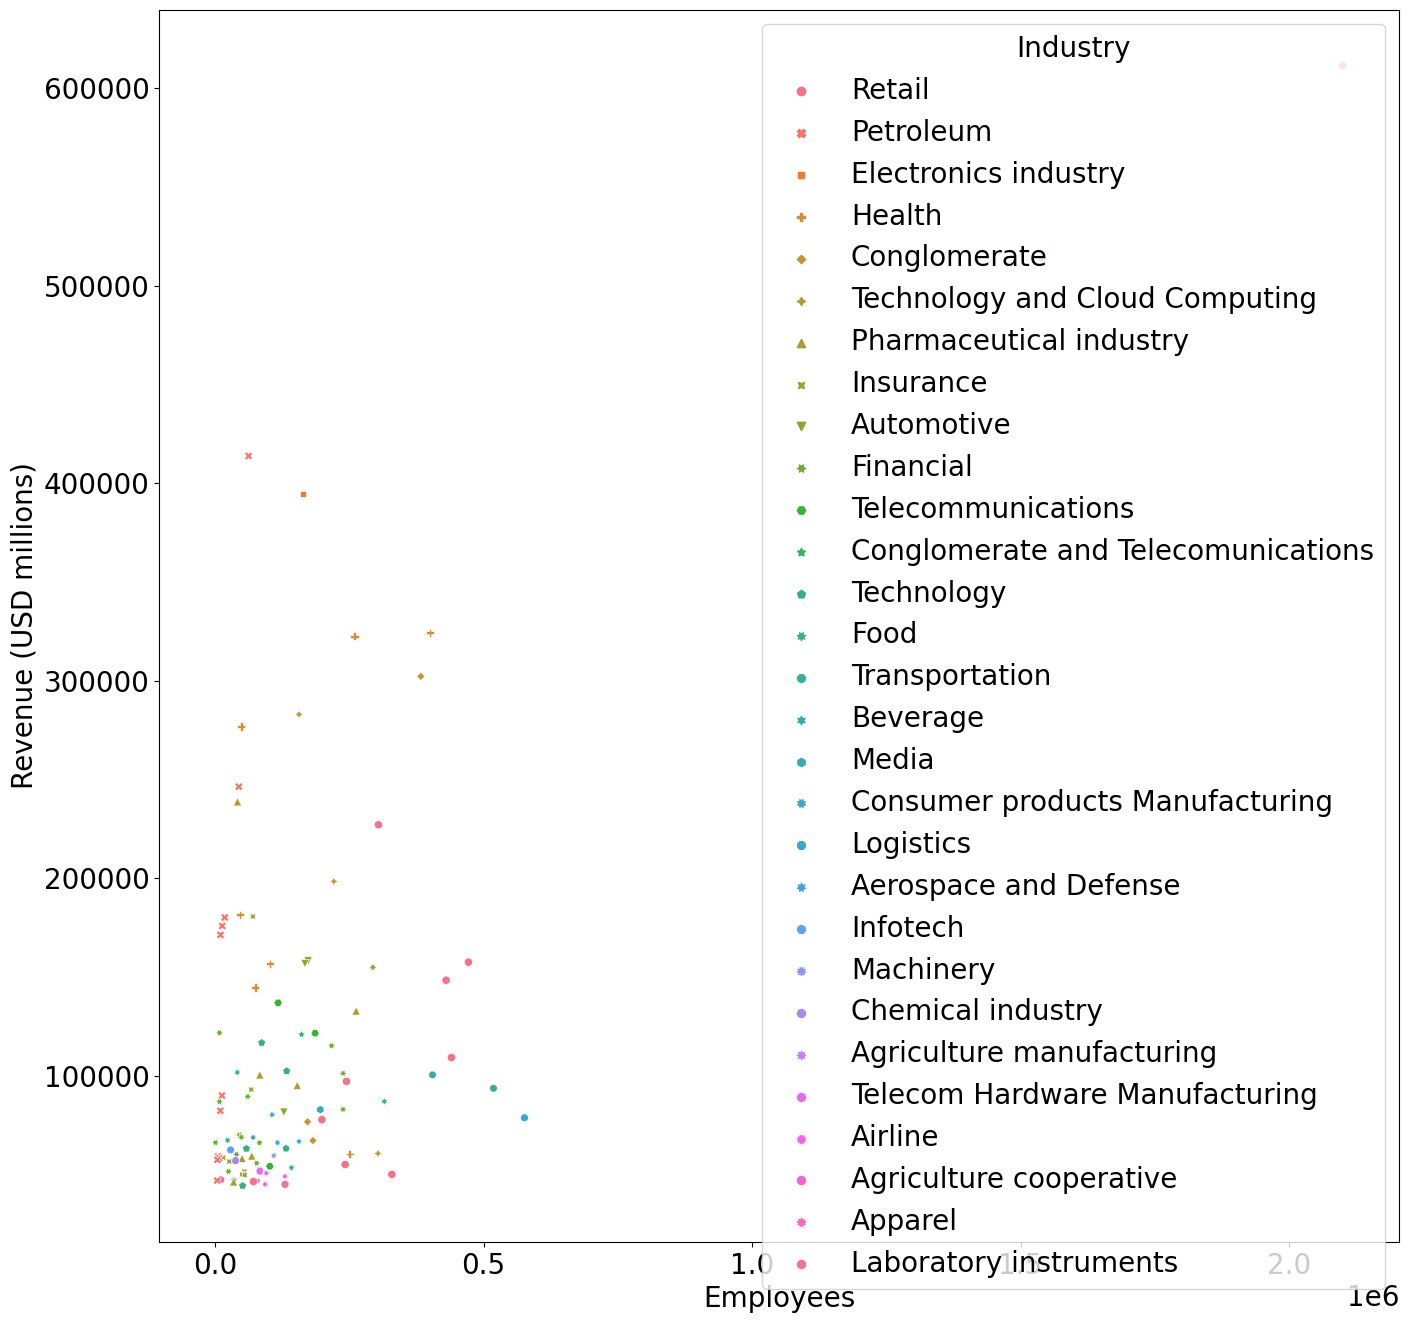

In [40]:
fig, ax = plt.subplots(figsize=(16,16))
sns.scatterplot(
    data=new_df,
    x='Employees',
    y='Revenue (USD millions)',
    hue='Industry',
    style= 'Industry'
)

In [41]:
print(Grouped_industry)

In [42]:
teste

,Industry,Revenue (USD millions)
3,Airline,144508
5,Automotive,396254
8,Conglomerate,445718
11,Electronics industry,394328
12,Financial,1189129
13,Food,337900
14,Health,1466079
16,Insurance,539247
21,Petroleum,1580268
22,Pharmaceutical industry,730059
